# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_results_file = "output_results/cities2.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create lists for data retrieval
nameof_cities = []
cloudiness = []
countrylst = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []
counter1 = 0
counter2 = 1


print("Start Data Retrieval ")
print("-----------------------------")

main_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url_query = f"{main_url}appid={weather_api_key}&units={units}&q="


#create loop to pull data
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url_query + city).json()
        nameof_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countrylst.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response["wind"]["speed"])
        if  counter1 > 49:
            counter1 = 0
            counter2 = counter2 + 1
    
        else:
            counter1 = counter1 + 1
            
            
        print(f"Processing Record {counter1} of Set {counter2} : {city}") 
        
  #print for no data found
    except(KeyError, IndexError):
        print("No city found. Next...")

print("-----------------------------")
print("End Data Retrieval")


Start Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : puerto ayora
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : hobart
Processing Record 4 of Set 1 : upernavik
Processing Record 5 of Set 1 : longyearbyen
Processing Record 6 of Set 1 : antofagasta
Processing Record 7 of Set 1 : paris
Processing Record 8 of Set 1 : ulaanbaatar
Processing Record 9 of Set 1 : dikson
Processing Record 10 of Set 1 : rio rancho
Processing Record 11 of Set 1 : cidreira
No city found. Next...
Processing Record 12 of Set 1 : lebu
Processing Record 13 of Set 1 : muisne
Processing Record 14 of Set 1 : shikarpur
Processing Record 15 of Set 1 : paciran
Processing Record 16 of Set 1 : nemuro
Processing Record 17 of Set 1 : esperance
Processing Record 18 of Set 1 : arraial do cabo
Processing Record 19 of Set 1 : salinas
No city found. Next...
Processing Record 20 of Set 1 : coquimbo
Processing Record 21 of Set 1 : vaini
Processing Record 22 of Set 1 : tasiilaq
Proc

Processing Record 38 of Set 4 : flinders
Processing Record 39 of Set 4 : marawi
Processing Record 40 of Set 4 : nalut
Processing Record 41 of Set 4 : boende
Processing Record 42 of Set 4 : mayo
Processing Record 43 of Set 4 : hailun
Processing Record 44 of Set 4 : cabedelo
No city found. Next...
Processing Record 45 of Set 4 : vostok
Processing Record 46 of Set 4 : yangjiang
No city found. Next...
Processing Record 47 of Set 4 : leningradskiy
Processing Record 48 of Set 4 : basco
No city found. Next...
Processing Record 49 of Set 4 : jaca
No city found. Next...
Processing Record 50 of Set 4 : atasu
Processing Record 0 of Set 5 : turka
Processing Record 1 of Set 5 : henties bay
Processing Record 2 of Set 5 : fortuna
Processing Record 3 of Set 5 : kazachinskoye
Processing Record 4 of Set 5 : tabou
Processing Record 5 of Set 5 : koscian
Processing Record 6 of Set 5 : terrace
Processing Record 7 of Set 5 : le portel
Processing Record 8 of Set 5 : port arthur
Processing Record 9 of Set 5 : 

Processing Record 28 of Set 8 : matamoros
No city found. Next...
Processing Record 29 of Set 8 : kachiry
Processing Record 30 of Set 8 : soe
Processing Record 31 of Set 8 : kysyl-syr
Processing Record 32 of Set 8 : tukrah
Processing Record 33 of Set 8 : kahului
Processing Record 34 of Set 8 : kaitong
Processing Record 35 of Set 8 : kumta
Processing Record 36 of Set 8 : kadnikov
Processing Record 37 of Set 8 : amazar
Processing Record 38 of Set 8 : lavrentiya
Processing Record 39 of Set 8 : oksfjord
Processing Record 40 of Set 8 : beipiao
Processing Record 41 of Set 8 : nouadhibou
Processing Record 42 of Set 8 : kudahuvadhoo
Processing Record 43 of Set 8 : lloydminster
Processing Record 44 of Set 8 : ippy
Processing Record 45 of Set 8 : amalapuram
Processing Record 46 of Set 8 : vengurla
Processing Record 47 of Set 8 : hohr-grenzhausen
Processing Record 48 of Set 8 : copiapo
Processing Record 49 of Set 8 : pimentel
Processing Record 50 of Set 8 : eisiskes
Processing Record 0 of Set 9 : 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : nameof_cities,
                "Cloudiness" : cloudiness,
                "Country" : countrylst,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : maxTemp,
                "Wind Speed" : windSpeed

})

weather_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [5]:
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,3,EC,1588226167,90,-0.74,-90.35,77.00,1.01
1,Rikitea,92,PF,1588226167,85,-23.12,-134.97,79.18,10.92
2,Hobart,75,AU,1588226167,62,-42.88,147.33,57.99,6.93
3,Upernavik,93,GL,1588226167,81,72.79,-56.15,21.88,6.89
4,Longyearbyen,90,SJ,1588226167,95,78.22,15.64,32.00,18.34


In [6]:
# Save city data into a csv file
weather_df.to_csv("output_results/cities2.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
#Comment: Temp goes down at max and min laitude. 

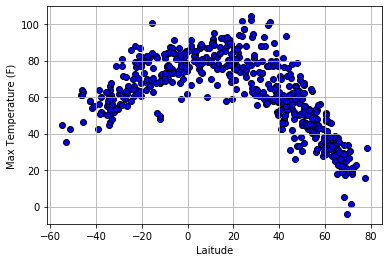

In [7]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], 
            facecolor = "blue", edgecolor = "black")
# Set x axis 
plt.xlabel("Laitude")
# Set y axis 
plt.ylabel("Max Temperature (F)")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.8)
#save
plt.savefig("../final_images/Latitude vs. Temperature Plot.png")

#### Latitude vs. Humidity Plot
#comment: warmer areas have a higher humidity percentage.

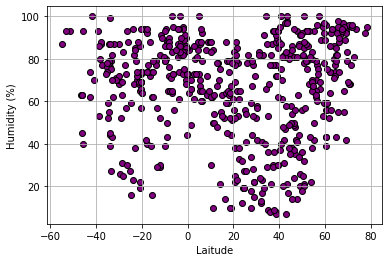

In [8]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], 
            facecolor = "purple", edgecolor = "black")
# Set x axis 
plt.xlabel("Laitude")
# Set y axis 
plt.ylabel("Humidity (%)")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.8)
#save
plt.savefig("../final_images/Latitude vs. Humidity Plot.png")

#### Latitude vs. Cloudiness Plot
#comment: In both max cloudiness and min cloudiness is the same no matter the latitude. 

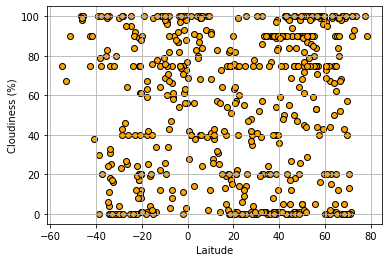

In [9]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "orange", edgecolor = "black")
# Set x axis
plt.xlabel("Laitude")
# Set y axis label
plt.ylabel("Cloudiness (%)")
# Set y axis limit
plt.ylim(-5,105)
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.8)
#save
plt.savefig("../final_images/Latitude vs. Cloudiness Plot.png")

#### Latitude vs. Wind Speed Plot
#comment: Lower winds speeds (under 10) are in most areas and displays even.

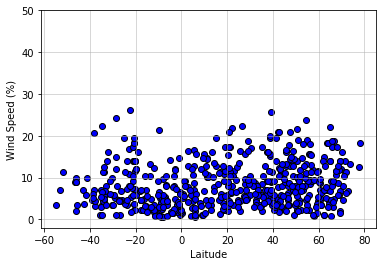

In [10]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")
# Set x axis 
plt.xlabel("Laitude")
# Set y axis 
plt.ylabel("Wind Speed (%)")
# Set axis limit
plt.ylim(-2,50)
# display grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
#save
plt.savefig("../final_images/Latitude vs. Wind Speed Plot.png")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df["Lat"] >= 0]
southern = weather_df.loc[weather_df["Lat"] < 0]

In [12]:
# Create Northern and Southern Hemisphere DataFrames
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define annotating fuction
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="darkred")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#comment: Negetive correlation

The r-squared is : -0.85


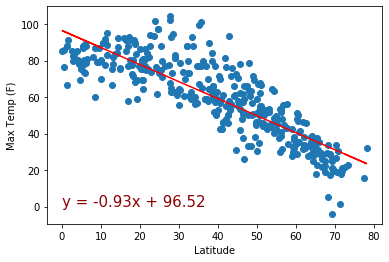

In [13]:
# Call an function #1
equation = linear_agression(northern["Lat"], northern["Max Temp"])
# Call an function #2
annotate(equation, 0, 0)
# Set y axis label
plt.ylabel("Max Temp (F)")
# Set x axis label
plt.xlabel("Latitude")
# Saveimage
plt.savefig("../final_images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
#comment: Positive correlation between the two.

The r-squared is : 0.68


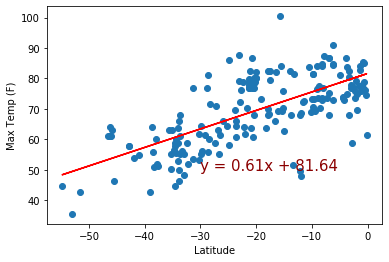

In [14]:
# Call an function #1 #same from above, change to Southern Hemisphere
equation = linear_agression(southern["Lat"],southern["Max Temp"])
# Call an function #2
annotate(equation, -30, 50)
# Set y axis label
plt.ylabel("Max Temp (F)")
# Set x axis label
plt.xlabel("Latitude")
#saveimage
plt.savefig("../final_images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#comment: Shows a moderate correlation

The r-squared is : 0.16


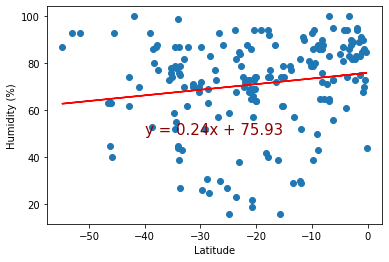

In [15]:
# Call an function #1
equation = linear_agression(southern["Lat"], southern["Humidity"])
# Call an function #2
annotate(equation, -40, 50)
# Set y axia label
plt.ylabel("Humidity (%)")
# Set x axis label
plt.xlabel("Latitude")
#save
plt.savefig("../final_images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#comment: Displays a somewhat positive correlation.

The r-squared is : 0.21


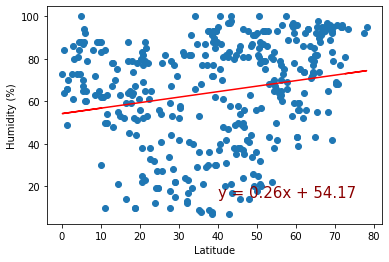

In [16]:
# Call an function #1
equation = linear_agression(northern["Lat"], northern["Humidity"])
# Call an function #2
annotate(equation, 40, 15)
# Set y axis label
plt.ylabel("Humidity (%)")
# Set x axis label
plt.xlabel("Latitude")
#save
plt.savefig("../final_images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 
#comment: Shows a weak but moderate correlation betwwen the two.

The r-squared is : 0.09


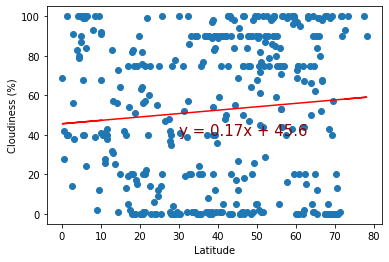

In [17]:
#Call an function #1
equation = linear_agression(northern["Lat"], northern["Cloudiness"])
# Call an function #2
annotate(equation, 30, 40)
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness (%)")
#save image
plt.savefig("../final_images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
#comment: This correlation is not stronge for Southern Hemisphere

The r-squared is : 0.13


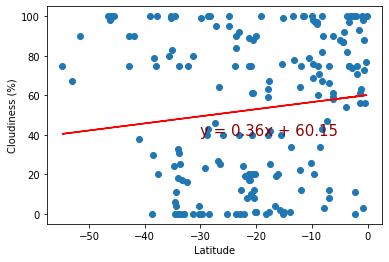

In [18]:
#Call an function #1
equation = linear_agression(southern["Lat"], southern["Cloudiness"])
# Call an function #2
annotate(equation, -30, 40)
# Set x axis label
plt.xlabel("Latitude")
# Set y axis label
plt.ylabel("Cloudiness (%)")
#save
plt.savefig("../final_images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#comment: The clustering of the dots shows positive but is also weak based in regression. 

The r-squared is : 0.1


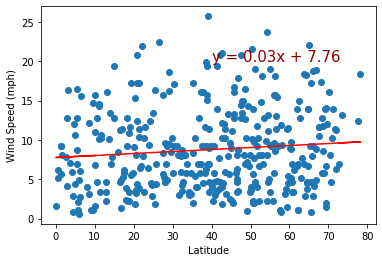

In [19]:
# Call an function #1
equation = linear_agression(northern["Lat"], northern["Wind Speed"])
# Call an function #2
annotate(equation, 40, 20)
# Set x axis label
plt.xlabel("Latitude")
# Set y axis label
plt.ylabel("Wind Speed (mph)")
#save
plt.savefig("../final_images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#comment: This is a negetive correlation shown.

The r-squared is : -0.19


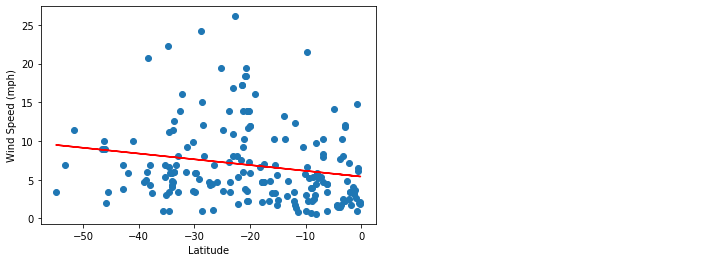

In [20]:
# Call an function #1
equation = linear_agression(southern["Lat"], southern["Wind Speed"])
# Call an function #2
annotate(equation, 40, 20)
# Set y axis label
plt.ylabel("Wind Speed (mph)")
# Set x axis label
plt.xlabel("Latitude")
#save
plt.savefig("../final_images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")